In [25]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

results_tables = {
    'planner_2000': '../experiments_sim/results/experiments_planner_2000_results.csv',
    'planner_200': '../experiments_sim/results/experiments_planner_200_results.csv',
    'handmade': '../experiments_sim/results/experiments_handmade_results.csv',
}

dataframes = {
    key: pd.read_csv(value) for key, value in results_tables.items()
}

In [26]:

dataframes['planner_2000'].head(10)

,experiment_id,belief_idx,state_idx,help_config_idx_local,belief_mus,belief_sigmas,state,help_config,conducted_datetime_stamp,accumulated_rewards,episode_lengths,n_successful_pickups,n_pickup_attempts,n_detection_from_help
0,1,0,0,-1,"[[-0.6707883940438972, -0.6738849536583333], [...","[[0.03341828090770939, 0.10977154734804455], [...","[[-0.6717436420397124, -0.6061821316477612], [...",NaN,2024-11-21_11-49-55_pid848191,0.883977,20,1,1,0
1,2,0,0,0,"[[-0.6707883940438972, -0.6738849536583333], [...","[[0.03341828090770939, 0.10977154734804455], [...","[[-0.6717436420397124, -0.6061821316477612], [...","[-1.9014330228342988, -1.6991118824551512, -0....",2024-11-21_11-49-55_pid848193,1.750647,20,2,6,4
2,3,0,0,1,"[[-0.6707883940438972, -0.6738849536583333], [...","[[0.03341828090770939, 0.10977154734804455], [...","[[-0.6717436420397124, -0.6061821316477612], [...","[-2.1805030081670105, -1.456472553959741, -0.6...",2024-11-21_11-49-55_pid848189,1.832796,20,2,3,2
3,4,0,0,2,"[[-0.6707883940438972, -0.6738849536583333], [...","[[0.03341828090770939, 0.10977154734804455], [...","[[-0.6717436420397124, -0.6061821316477612], [...","[-0.6830265903194725, -1.7805955759059928, -0....",2024-11-21_11-49-55_pid848201,2.799484,20,3,3,3
4,5,0,0,3,"[[-0.6707883940438972, -0.6738849536583333], [...","[[0.03341828090770939, 0.10977154734804455], [...","[[-0.6717436420397124, -0.6061821316477612], [...","[-2.313662072491533, -1.6991831441213614, -0.9...",2024-11-21_11-49-55_pid848198,0.743902,20,1,6,4
5,6,0,0,4,"[[-0.6707883940438972, -0.6738849536583333], [...","[[0.03341828090770939, 0.10977154734804455], [...","[[-0.6717436420397124, -0.6061821316477612], [...","[0.9228154497246033, -1.0492493359058759, 1.40...",2024-11-21_11-49-55_pid848192,4.065761,17,4,5,4
6,7,0,0,5,"[[-0.6707883940438972, -0.6738849536583333], [...","[[0.03341828090770939, 0.10977154734804455], [...","[[-0.6717436420397124, -0.6061821316477612], [...","[1.2654757011851672, -0.3164468112587193, 0.34...",2024-11-21_11-49-55_pid848190,1.813858,20,2,3,2
7,8,0,0,6,"[[-0.6707883940438972, -0.6738849536583333], [...","[[0.03341828090770939, 0.10977154734804455], [...","[[-0.6717436420397124, -0.6061821316477612], [...","[-1.104839879259845, -2.8236289196167896, -0.3...",2024-11-21_11-49-55_pid848202,2.722116,20,3,5,3
8,9,0,0,7,"[[-0.6707883940438972, -0.6738849536583333], [...","[[0.03341828090770939, 0.10977154734804455], [...","[[-0.6717436420397124, -0.6061821316477612], [...","[-1.454699944611191, -1.6698776753158502, -1.7...",2024-11-21_11-49-55_pid848187,3.832298,19,4,6,4
9,10,0,0,8,"[[-0.6707883940438972, -0.6738849536583333], [...","[[0.03341828090770939, 0.10977154734804455], [...","[[-0.6717436420397124, -0.6061821316477612], [...","[-1.4818613085642476, -2.237436739801526, -0.9...",2024-11-21_11-49-56_pid848188,0.891330,20,1,1,0


first for general understanding, print the mean accumulated reward with help, without help, and total for each planner

In [27]:
# in each df there is just accumulated rewards column
for key, df in dataframes.items():
    print("--------")
    print(key)
    print("--------")
    print(f"mean accumulated reward {df['accumulated_rewards'].mean()}")
    print(f"mean accumulated reward without help {df[df['help_config_idx_local'] == -1]['accumulated_rewards'].mean()}")
    print(f"mean accumulated reward with help {df[df['help_config_idx_local'] != -1]['accumulated_rewards'].mean()}")
    print("num of beliefs: ", len(df['belief_idx'].unique()))
    print("num of states: ", len(df['state_idx'].unique()))
    print("num of help configs: ", len(df['help_config_idx_local'].unique()) - 1 )

    mean_pickup_attempts_no_help = df[df['help_config_idx_local'] == -1]['n_pickup_attempts'].mean()
    mean_successful_pickup_no_help = df[df['help_config_idx_local'] == -1]['n_successful_pickups'].mean()
    ratio_no_help = mean_successful_pickup_no_help / mean_pickup_attempts_no_help
    print (f"mean num of pickup attempts without help: {mean_pickup_attempts_no_help},"
           f" succesful pickups: {mean_successful_pickup_no_help},"
           f" successful pickup ratio: {ratio_no_help}")

--------
planner_2000
--------
mean accumulated reward 2.0215249156989823
mean accumulated reward without help 0.2833053194366374
mean accumulated reward with help 2.0649804056055405
num of beliefs:  75
num of states:  10
num of help configs:  40
mean num of pickup attempts without help: 1.8413333333333333, succesful pickups: 0.43733333333333335, successful pickup ratio: 0.2375090514120203
--------
planner_200
--------
mean accumulated reward 2.048132335010301
mean accumulated reward without help 0.30883889650930285
mean accumulated reward with help 2.091614670972826
num of beliefs:  75
num of states:  10
num of help configs:  40
mean num of pickup attempts without help: 4.765333333333333, succesful pickups: 0.5733333333333334, successful pickup ratio: 0.12031337437045328
--------
handmade
--------
mean accumulated reward 1.935910463468166
mean accumulated reward without help 0.6029193770571056
mean accumulated reward with help 1.9692352406284426
num of beliefs:  75
num of states:  10


Create new dataframe for value difference between with help and without help for each help config

In [28]:
from data_processing.process_experiments_results import experiments_results_to_empirical_vd_table
value_diff_dfs = {}
for key, df in dataframes.items():
    vd_df = experiments_results_to_empirical_vd_table(df)
    vd_df = vd_df[['experiment_id', 'belief_idx', 'state_idx', 'help_config_idx_local', 'value_diff']]
    value_diff_dfs[key] = vd_df


In [29]:
value_diff_dfs['planner_2000'].head(5)

,experiment_id,belief_idx,state_idx,help_config_idx_local,value_diff
0,2,0,0,0,0.866670
1,3,0,0,1,0.948819
2,4,0,0,2,1.915507
3,5,0,0,3,-0.140075
4,6,0,0,4,3.181784


Try using help as empirical mean estimator to VOA, then try belief as empirical mean estimator to VOA, then try both

In [30]:
def empirical_mean_estimator_belief(df, belief_idx):
    belief_df = df[df['belief_idx'] == belief_idx]
    return belief_df['value_diff'].mean()

def empirical_mean_estimator_help(df, help_config_idx):
    help_df = df[df['help_config_idx_local'] == help_config_idx]
    return help_df['value_diff'].mean()

def empirical_mean_estimator_both(df, belief_idx, help_config_idx):
    both_df = df[(df['belief_idx'] == belief_idx) & (df['help_config_idx_local'] == help_config_idx)]
    return both_df['value_diff'].mean()

In [31]:
def test_estimators_results(value_diff_df):
    # use estimator on all samples and compute mean error
    belief_errors = []
    help_errors = []
    both_errors = []
    for belief_idx in value_diff_df['belief_idx'].unique():
        belief_error = np.abs(value_diff_df[value_diff_df['belief_idx'] == belief_idx]['value_diff'] - empirical_mean_estimator_belief(value_diff_df, belief_idx)).mean()
        belief_errors.append(belief_error)

    for help_config_idx in value_diff_df['help_config_idx_local'].unique():
        help_error = np.abs(value_diff_df[value_diff_df['help_config_idx_local'] == help_config_idx]['value_diff'] - empirical_mean_estimator_help(value_diff_df, help_config_idx)).mean()
        help_errors.append(help_error)

    for belief_idx in value_diff_df['belief_idx'].unique():
        for help_config_idx in value_diff_df['help_config_idx_local'].unique():
            both_error = np.abs(value_diff_df[(value_diff_df['belief_idx'] == belief_idx) & (value_diff_df['help_config_idx_local'] == help_config_idx)]['value_diff'] - empirical_mean_estimator_both(value_diff_df, belief_idx, help_config_idx)).mean()
            both_errors.append(both_error)
    return np.mean(belief_errors), np.mean(help_errors), np.mean(both_errors)

In [32]:
for key, value_diff_df in value_diff_dfs.items():
    belief_error, help_error, both_error = test_estimators_results(value_diff_df)
    print(f"{key} belief error: {belief_error}")
    print(f"{key} help error: {help_error}")
    print(f"{key} both error: {both_error}")

planner_2000 belief error: 0.9353161244158478
planner_2000 help error: 0.8242318587568078
planner_2000 both error: 0.7476670317412989
planner_200 belief error: 1.0179515668988481
planner_200 help error: 0.9151239484987336
planner_200 both error: 0.8264945884149796
handmade belief error: 0.7912499065973114
handmade help error: 0.780851323064495
handmade both error: 0.6908395923232495


Sample Size Considerations, sample sizes are:
Help action estimates: 250 samples (25 beliefs × 10 states)
Belief estimates: 400 samples (40 help actions × 10 states)
Both combined: 10 samples
Given these sample sizes, it's particularly noteworthy that the "both" estimator performs best despite having the smallest sample size (only 10 samples). This strongly suggests that both belief and help configuration contain important information for prediction, as the improved accuracy outweighs the disadvantage of having fewer samples.

compute std of value diff for each help config- belief pair and plot histogram

In [33]:
def compute_std_for_help_belief_pair(value_diff_df):
    stds = []
    means = []
    for belief_idx in value_diff_df['belief_idx'].unique():
        for help_config_idx in value_diff_df['help_config_idx_local'].unique():
            std = value_diff_df[(value_diff_df['belief_idx'] == belief_idx) & (value_diff_df['help_config_idx_local'] == help_config_idx)]['value_diff'].std()
            mean = value_diff_df[(value_diff_df['belief_idx'] == belief_idx) & (value_diff_df['help_config_idx_local'] == help_config_idx)]['value_diff'].mean()
            stds.append(std)
            means.append(mean)

    # plot histogram of stds and means
    return stds, means

planner_2000 mean std: 0.9596038326830452


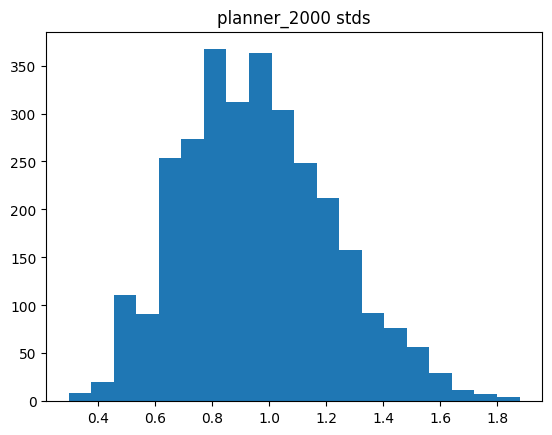

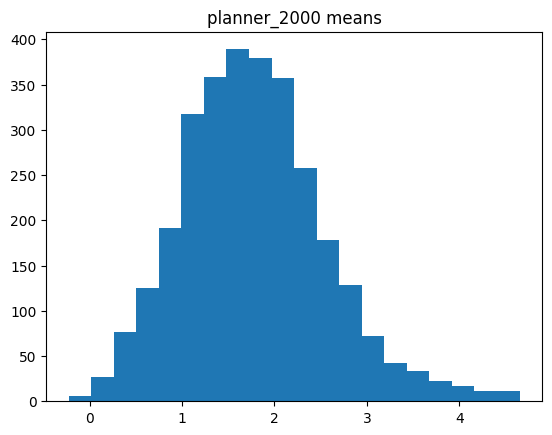

planner_200 mean std: 1.0634129174143123


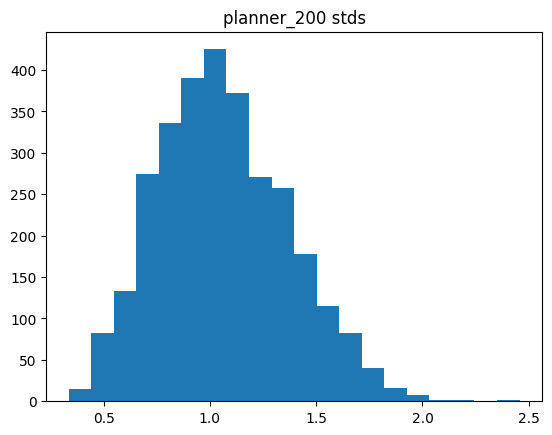

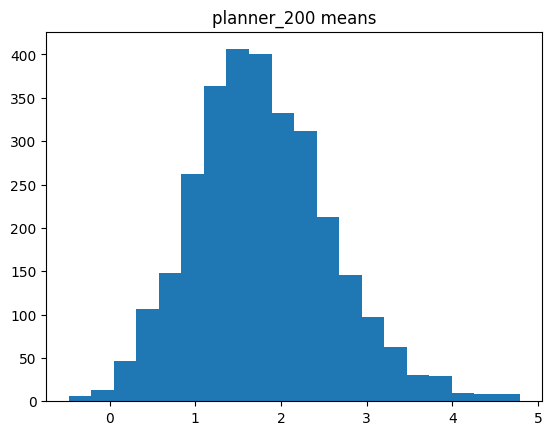

handmade mean std: 0.8828512859392128


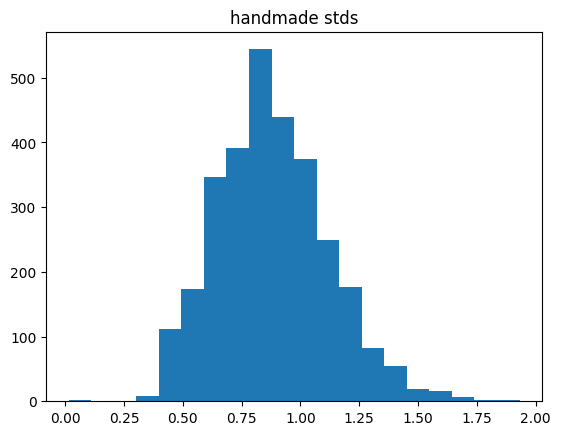

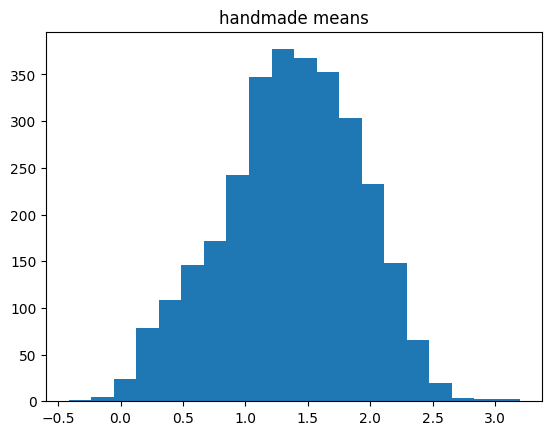

In [35]:
for key, value_diff_df in value_diff_dfs.items():
    stds, means = compute_std_for_help_belief_pair(value_diff_df)
    print(f"{key} mean std:", np.mean(stds))
    plt.hist(stds, bins=20)
    plt.title(f"{key} stds")
    plt.show()
    plt.hist(means, bins=20)
    plt.title(f"{key} means")
    plt.show()